In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#to reset pandas display options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [12]:
# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Optional: expand column width so text isn’t truncated
pd.set_option('display.max_colwidth', None)

# data collection

In [3]:
sonar_data=pd.read_csv("Copy of sonar data.csv", header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### eda

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
sonar_data.isnull().sum().count()

61

In [6]:
sonar_data.shape

(208, 61)

In [13]:
sonar_data.dtypes.to_list()

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('floa

In [14]:
sonar_data.sample(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
97,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,0.0947,0.2497,0.2209,0.3195,0.3340,0.3323,0.2780,0.2975,0.2948,0.1729,0.3264,0.3834,0.3523,0.5410,0.5228,0.4475,0.5340,0.5323,0.3907,0.3456,0.4091,0.4639,0.5580,0.5727,0.6355,0.7563,0.6903,0.6176,0.5379,0.5622,0.6508,0.4797,0.3736,0.2804,0.1982,0.2438,0.1789,0.1706,0.0762,0.0238,0.0268,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,M
43,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,0.2132,0.3738,0.3738,0.2673,0.2333,0.5367,0.7312,0.7659,0.6271,0.4395,0.4330,0.4326,0.5544,0.7360,0.8589,0.8989,0.9420,0.9401,0.9379,0.8575,0.7284,0.6700,0.7547,0.8773,0.9919,0.9922,0.9419,0.8388,0.6605,0.4816,0.2917,0.1769,0.1136,0.0701,0.1578,0.1938,0.1106,0.0693,0.0176,0.0205,0.0309,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
38,0.0123,0.0022,0.0196,0.0206,0.0180,0.0492,0.0033,0.0398,0.0791,0.0475,0.1152,0.0520,0.1192,0.1943,0.1840,0.2077,0.1956,0.1630,0.1218,0.1017,0.1354,0.3157,0.4645,0.5906,0.6776,0.8119,0.8594,0.9228,0.8387,0.7238,0.6292,0.5181,0.4629,0.5255,0.5147,0.3929,0.1279,0.0411,0.0859,0.1131,0.1306,0.1757,0.2648,0.1955,0.0656,0.0580,0.0319,0.0301,0.0272,0.0074,0.0149,0.0125,0.0134,0.0026,0.0038,0.0018,0.0113,0.0058,0.0047,0.0071,R
121,0.0162,0.0041,0.0239,0.0441,0.0630,0.0921,0.1368,0.1078,0.1552,0.1779,0.2164,0.2568,0.3089,0.3829,0.4393,0.5335,0.5996,0.6728,0.7309,0.8092,0.8941,0.9668,1.0000,0.9893,0.9376,0.8991,0.9184,0.9128,0.7811,0.6018,0.3765,0.3300,0.2280,0.0212,0.1117,0.1788,0.2373,0.2843,0.2241,0.2715,0.3363,0.2546,0.1867,0.2160,0.1278,0.0768,0.1070,0.0946,0.0636,0.0227,0.0128,0.0173,0.0135,0.0114,0.0062,0.0157,0.0088,0.0036,0.0053,0.0030,M
95,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,0.0942,0.0794,0.0252,0.1191,0.1045,0.2050,0.1556,0.2690,0.3784,0.4024,0.3470,0.1395,0.1208,0.2827,0.1500,0.2626,0.4468,0.7520,0.9036,0.7812,0.4766,0.2483,0.5372,0.6279,0.3647,0.4572,0.6359,0.6474,0.5520,0.3253,0.2292,0.0653,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111,R
187,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,0.2936,0.2935,0.2657,0.3187,0.2794,0.2534,0.1980,0.1929,0.2826,0.3245,0.3504,0.3324,0.4217,0.4774,0.4808,0.6325,0.8334,0.9458,1.0000,0.8425,0.5524,0.4795,0.5200,0.3968,0.1940,0.1519,0.2010,0.1736,0.1029,0.2244,0.3717,0.4449,0.3939,0.2030,0.2010,0.2187,0.1840,0.1477,0.0971,0.0224,0.0151,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052,M
170,0.0134,0.0172,0.0178,0.0363,0.0444,0.0744,0.0800,0.0456,0.0368,0.1250,0.2405,0.2325,0.2523,0.1472,0.0669,0.1100,0.2353,0.3282,0.4416,0.5167,0.6508,0.7793,0.7978,0.7786,0.8587,0.9321,0.9454,0.8645,0.7220,0.4850,0.1357,0.2951,0.4715,0.6036,0.8083,0.9870,0.8800,0.6411,0.4276,0.2702,0.2642,0.3342,0.4335,0.4542,0.3960,0.2525,0.1084,0.0372,0.0286,0.0099,0.0046,0.0094,0.0048,0.0047,0.0016,0.0008,0.0042,0.0024,0.0027,0.0041,M
14,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,0.1640,0.1901,0.3026,0.2019,0.0592,0.2390,0.3657,0.3809,0.5929,0.6299,0.5801,0.4574,0.4449,0.3691,0.6446,0.8940,0.8978,0.4980,0.3333,0.2350,0.1553,0.3666,0.4340,0.3082,0.3024,0.4109,0.5501,0.4129,0.5499,0.5018,0.3132,0.2802,0.2351,0.2298,0.1155,0.0724,0.0621,0.0318,0.0450,0.0167,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062,R
16,0.0352,0.0116,0.0191,0.0469,0.0737,0.1185,0.1683,0.1541,0.1466,0.2912,0.2328,0.2237,0.2470,0.1560,0.3491,0.3308,0.2299,0.2203,0.2493,0.4128,0.3158,0.6191,0.5854,0.3395,0.2561,0.5599,0.8145,0.6941,0.6985,0.8660,0.5930,0.3664,0.6750,0.8697,0.7837,0.7552,0.5789,0.4713,0.1252,0.6087,0.7322,0.5977,0.3431,0.1803,0.2378,0.3424,0.2303,0.0689,0.0216,0.0469,0.0426,0.0346,0.0158,0.0154,0.0109,0.0048,0.0095,0.0015,0.0073,0.0067,

In [ ]:
sonar_data[60].value_counts()
#no need to balance the dataset as it is already balanced
# 111 rocks and 97 mines

60
M    111
R     97
Name: count, dtype: int64

In [19]:
print(sonar_data.isnull().mean() * 100)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
60    0.0
dtype: float64


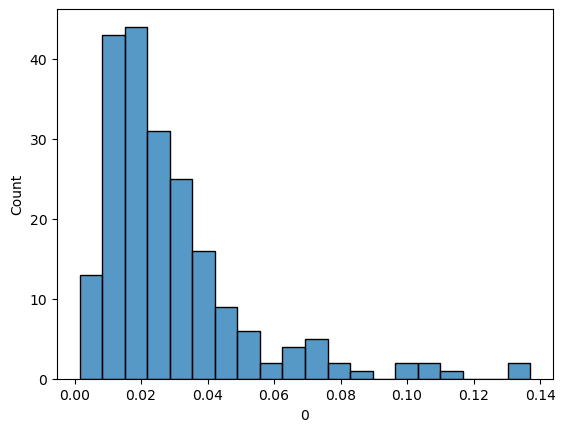

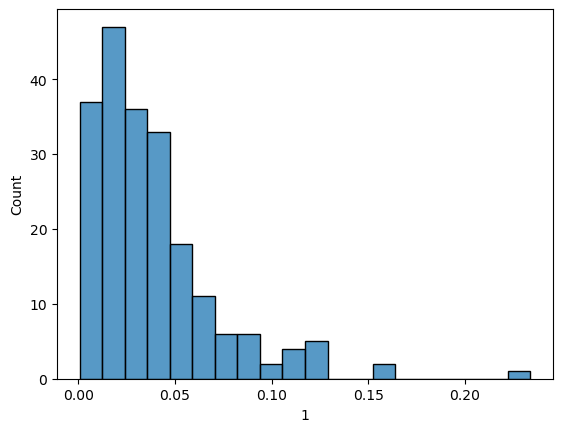

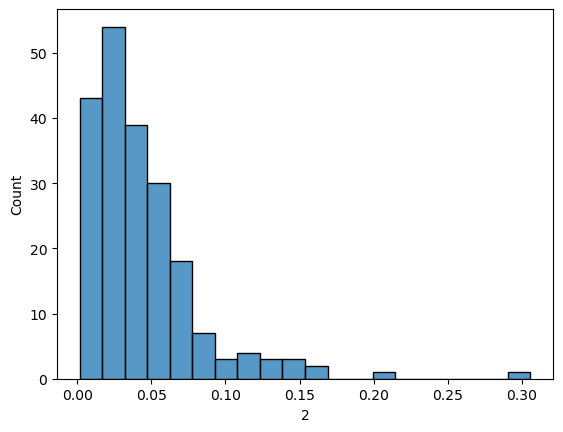

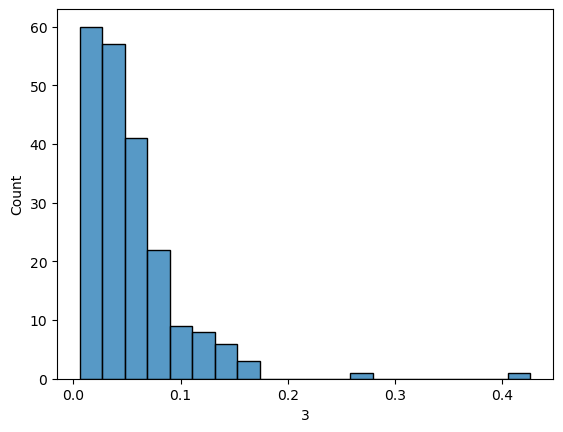

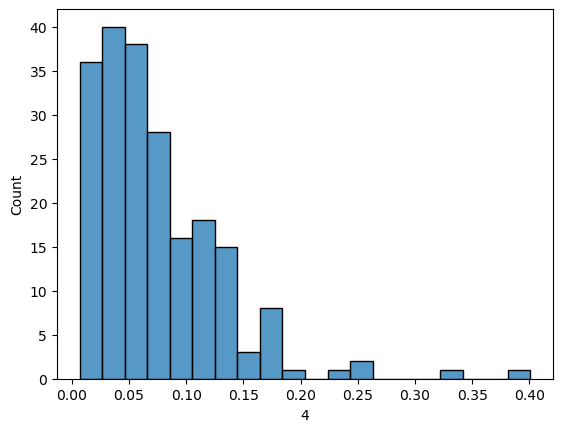

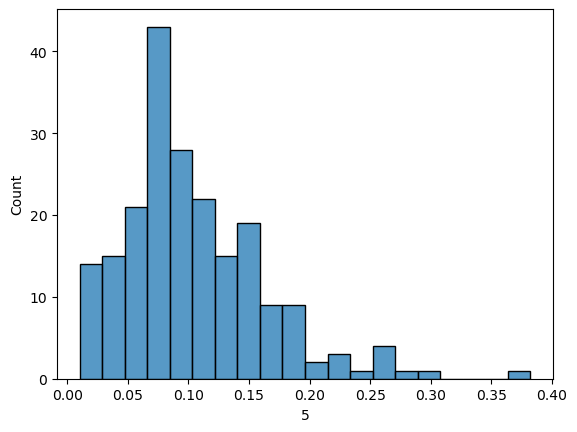

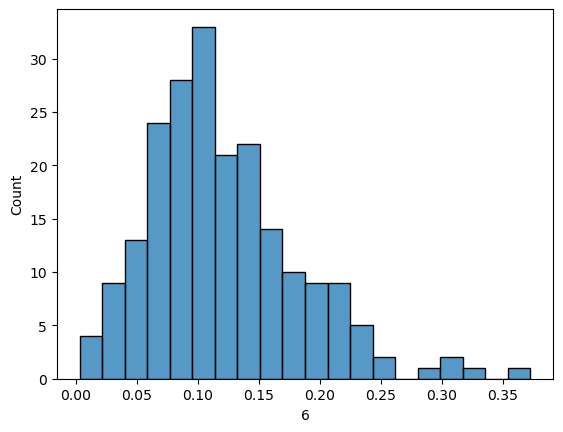

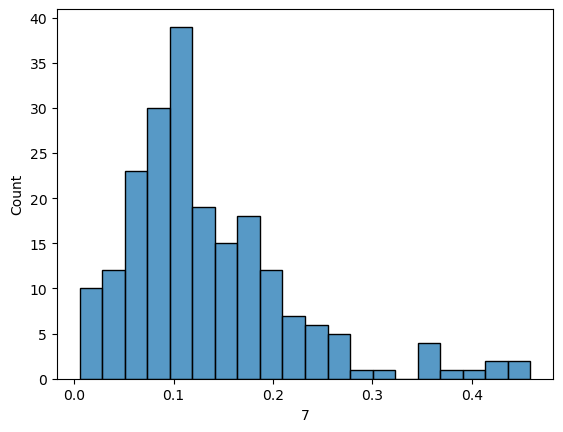

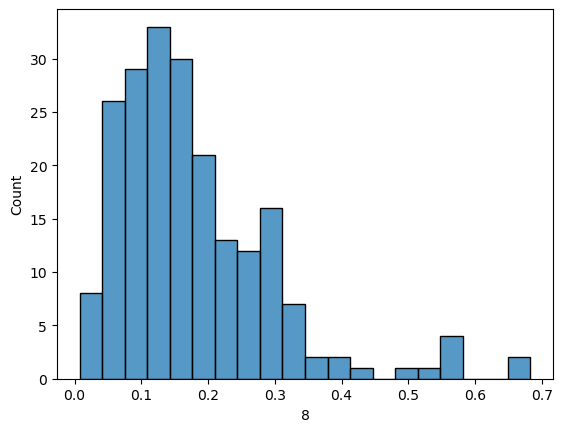

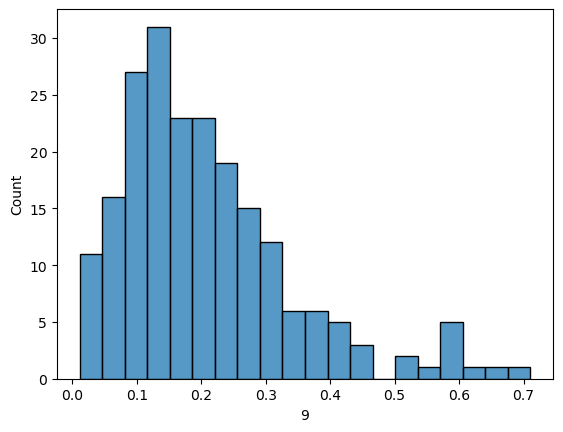

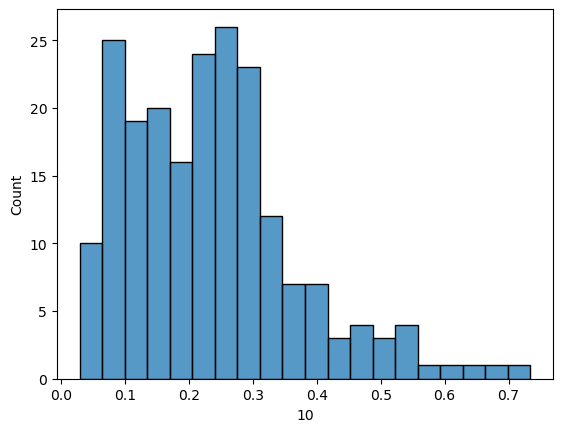

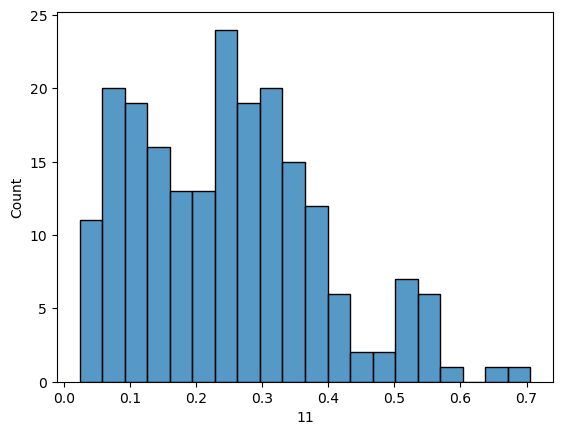

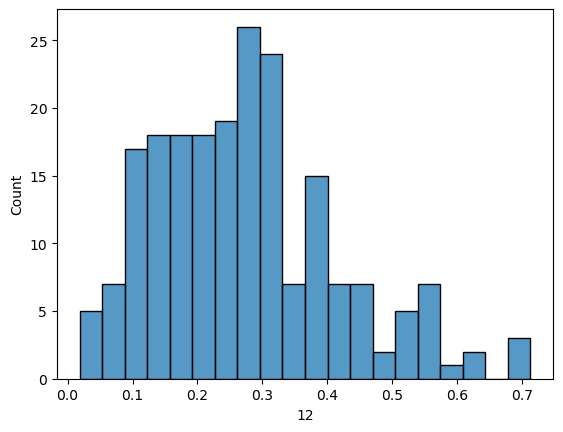

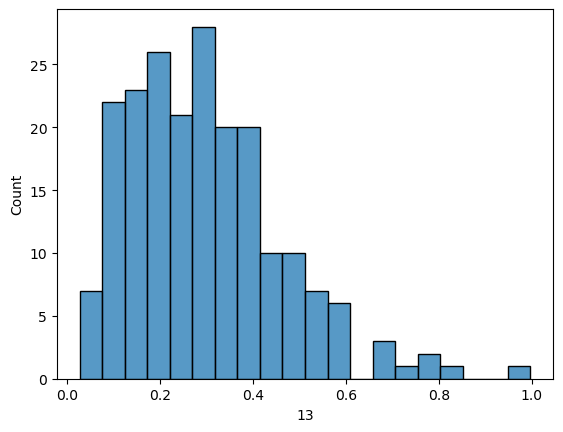

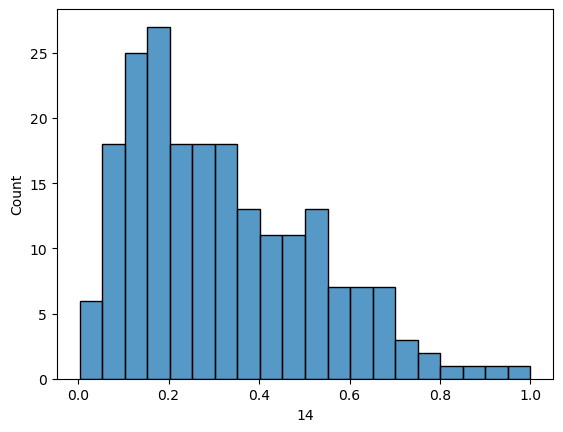

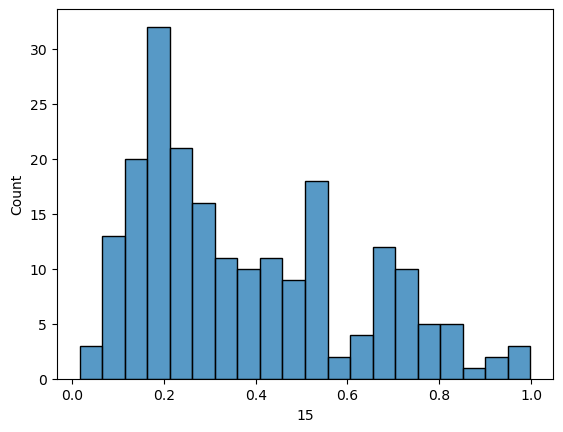

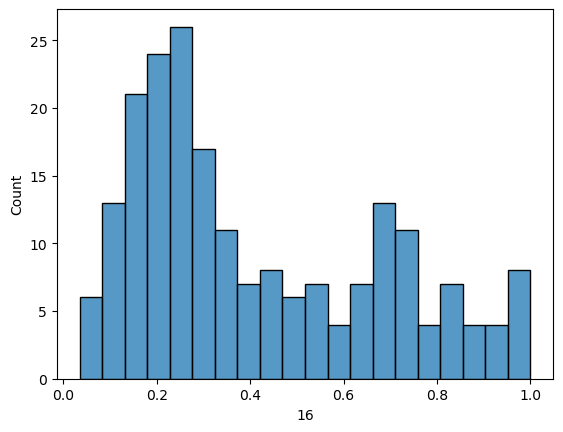

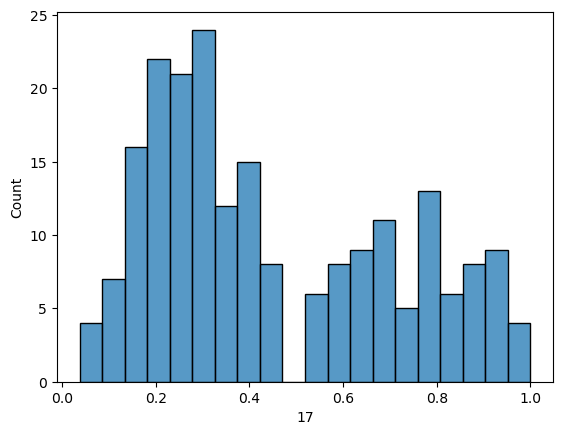

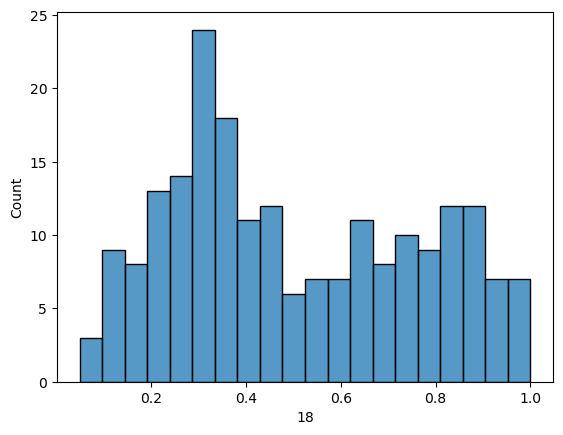

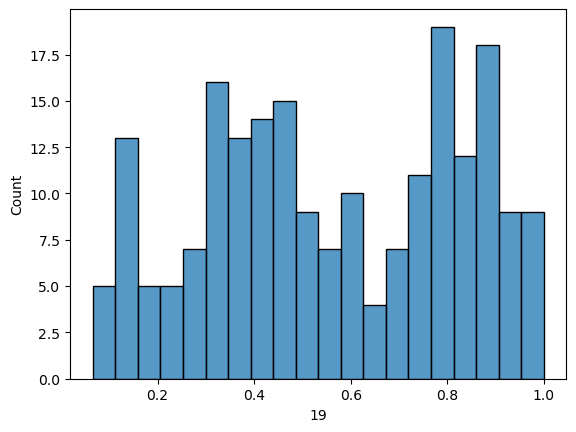

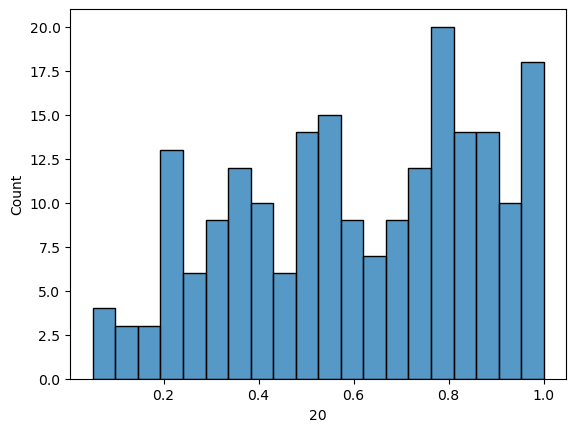

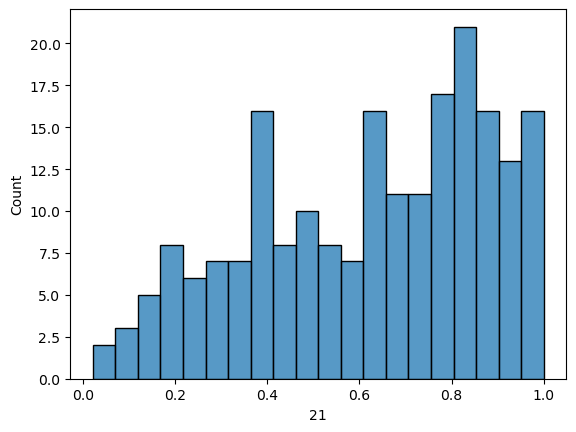

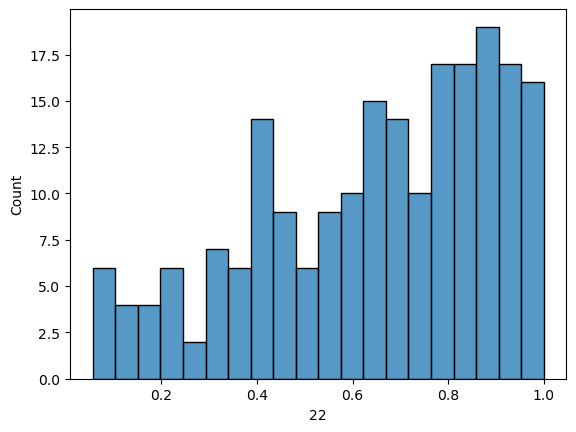

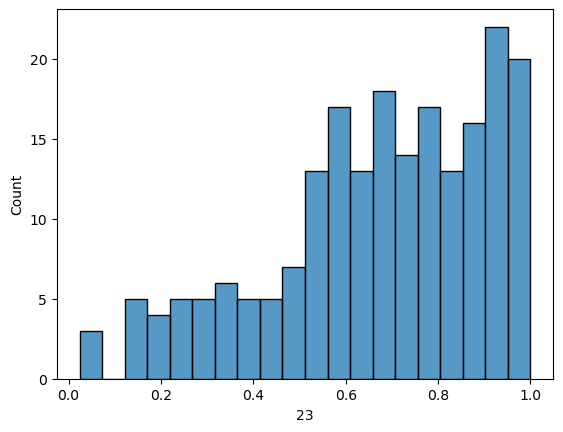

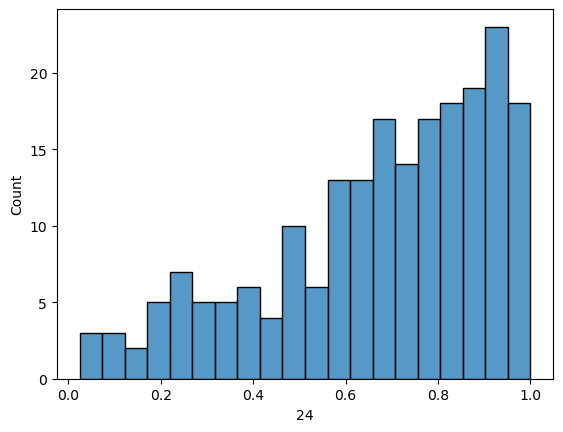

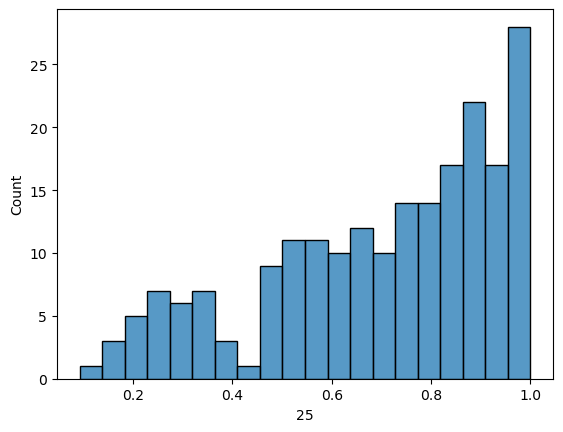

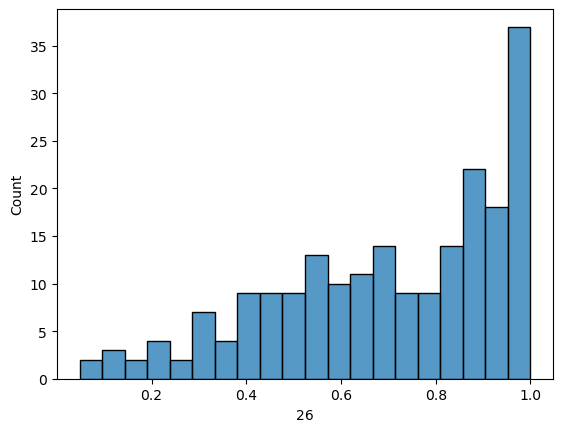

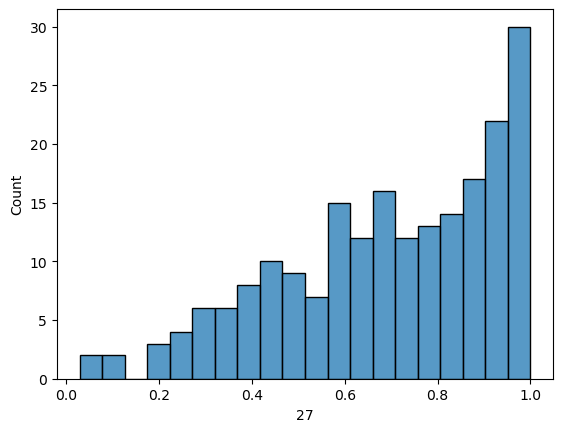

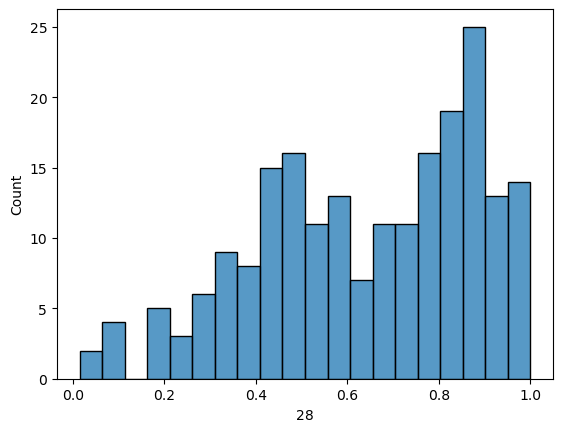

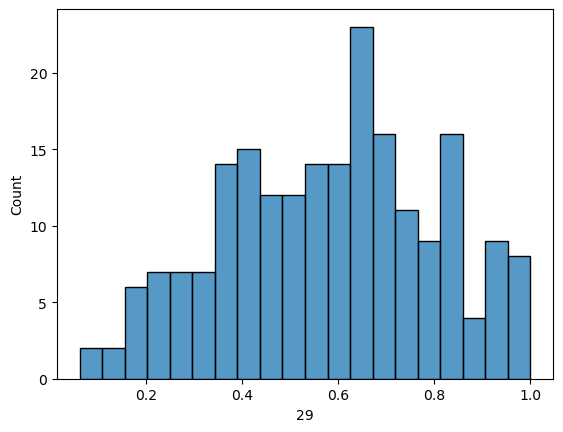

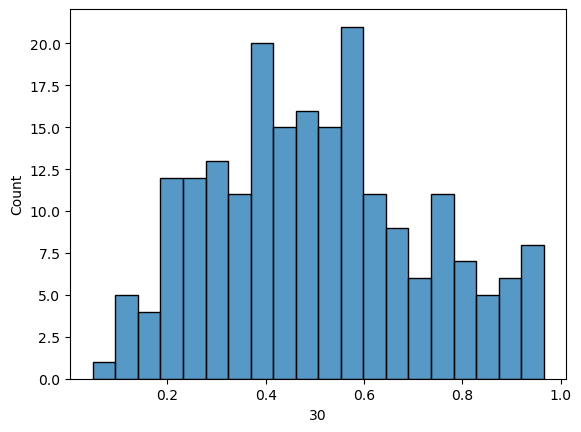

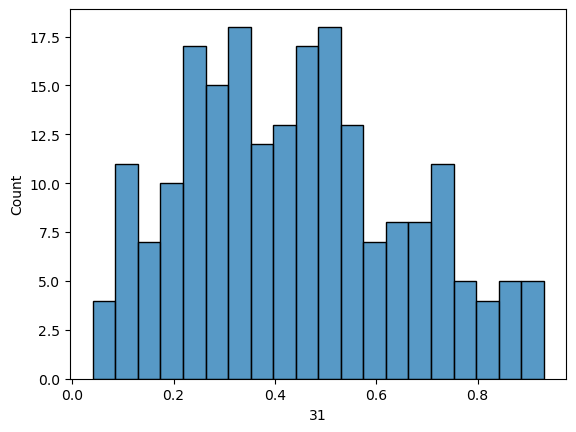

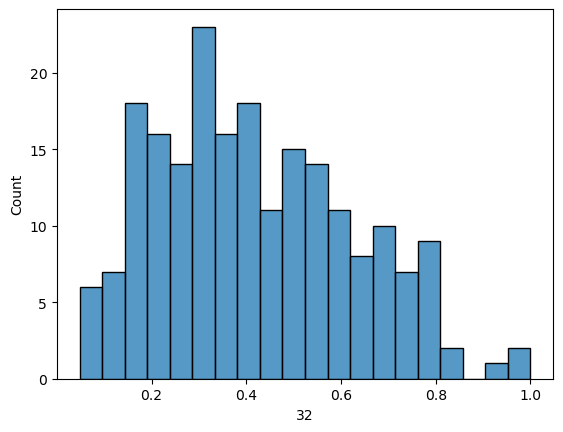

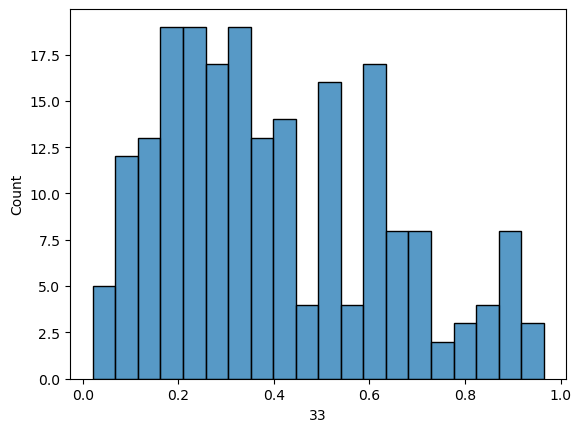

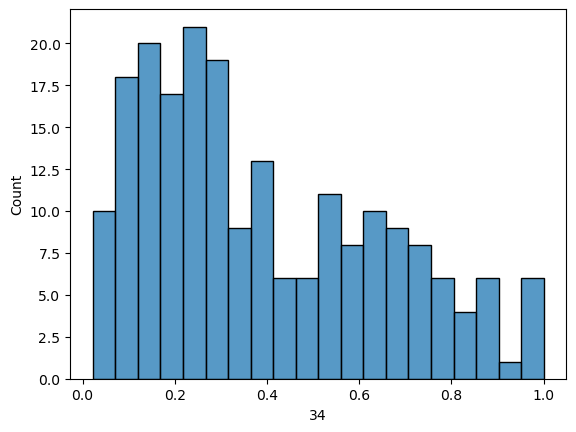

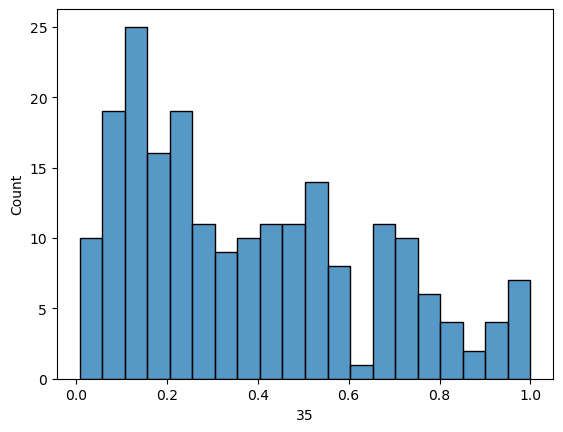

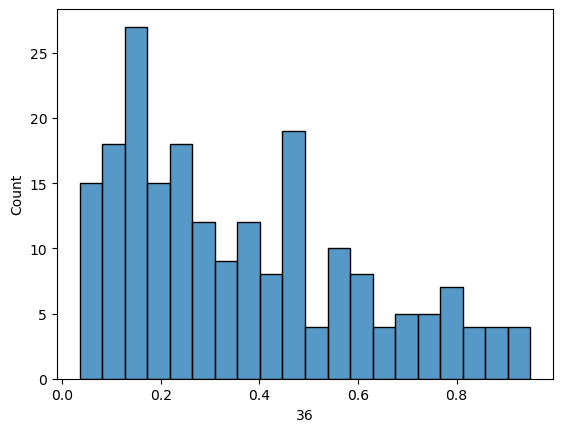

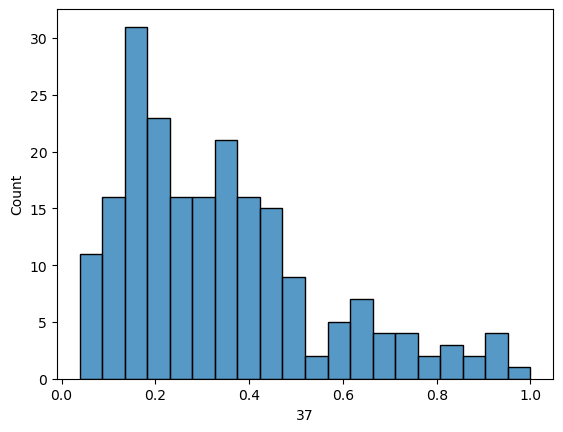

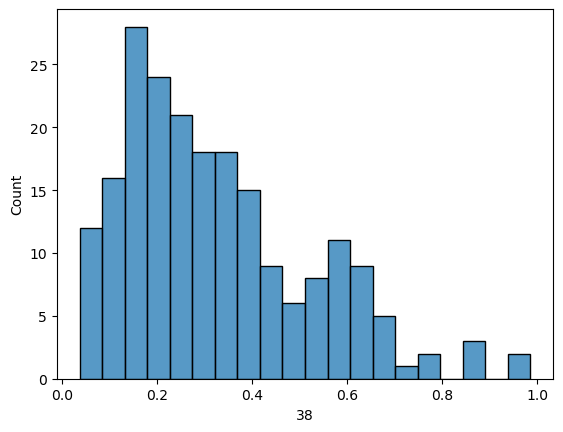

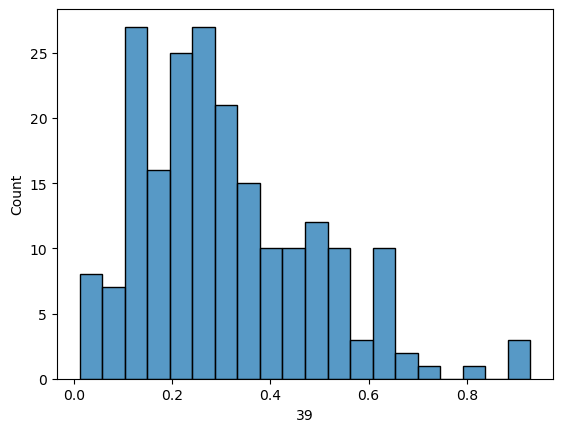

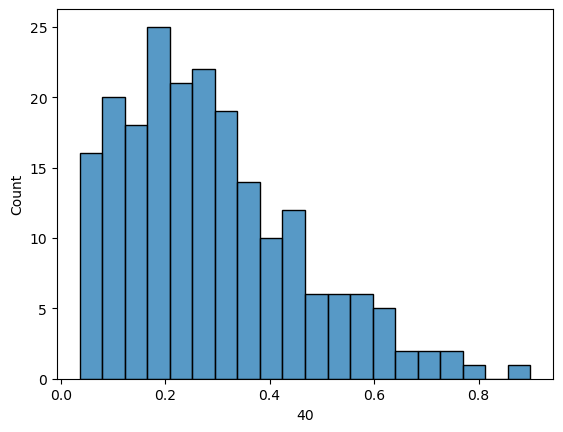

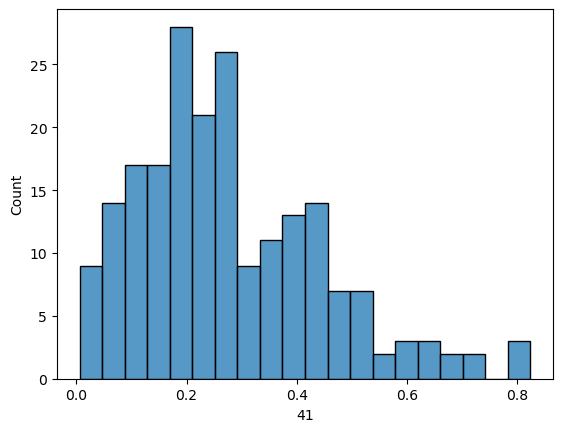

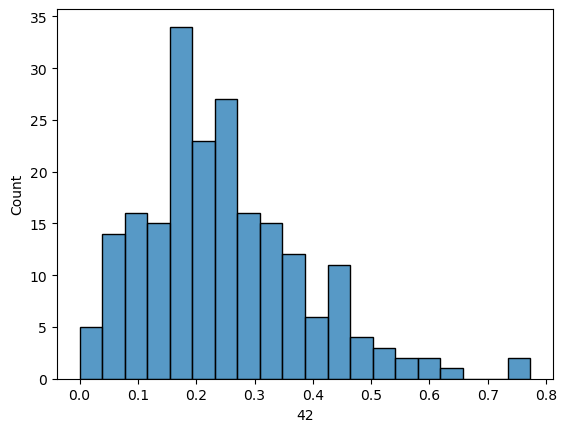

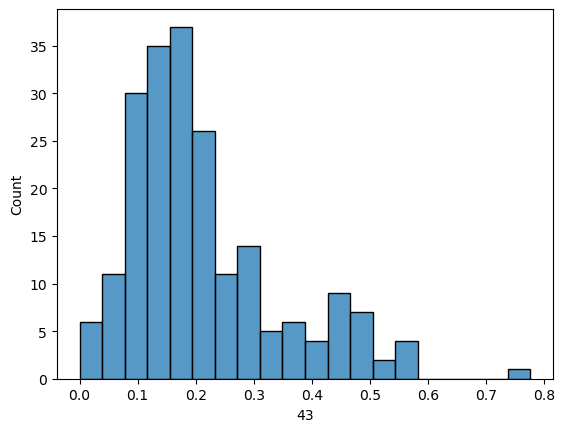

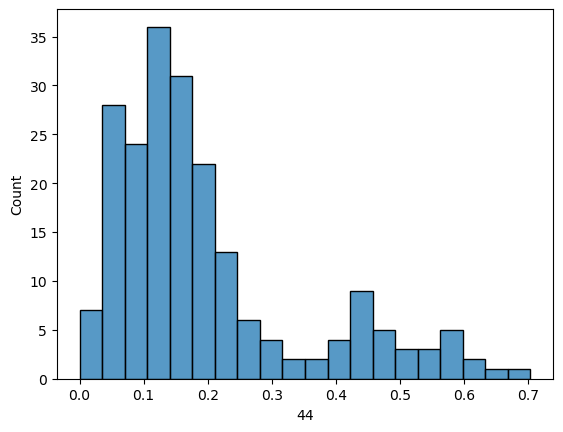

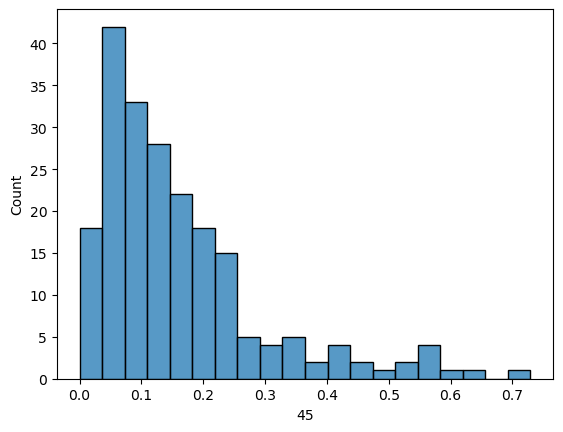

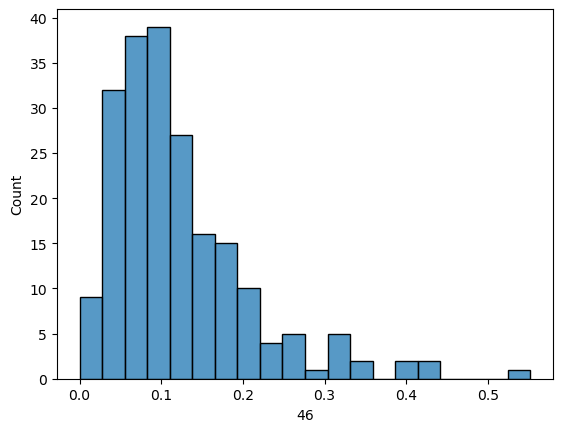

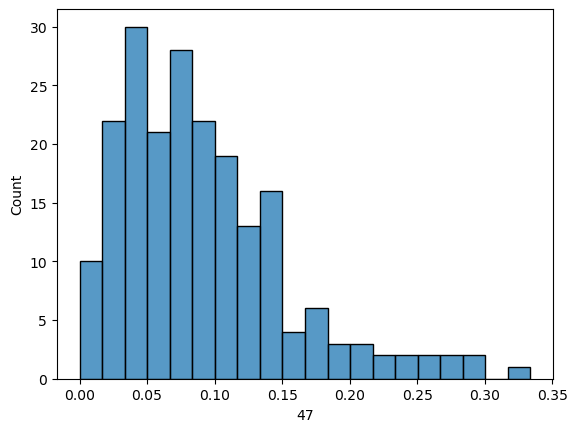

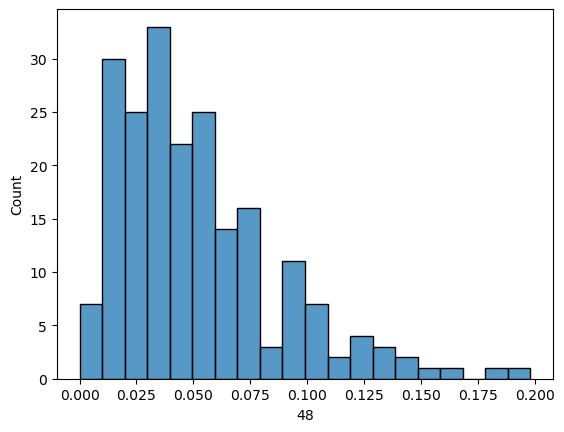

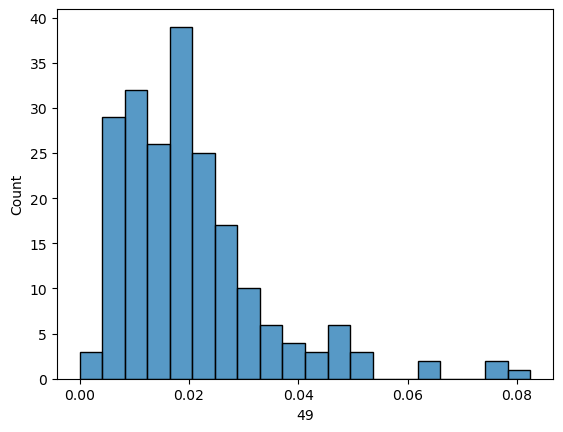

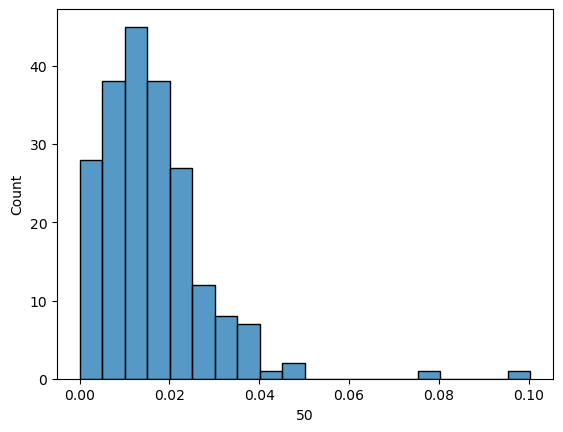

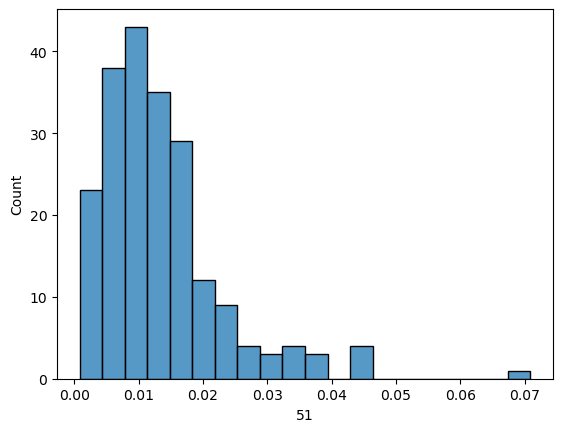

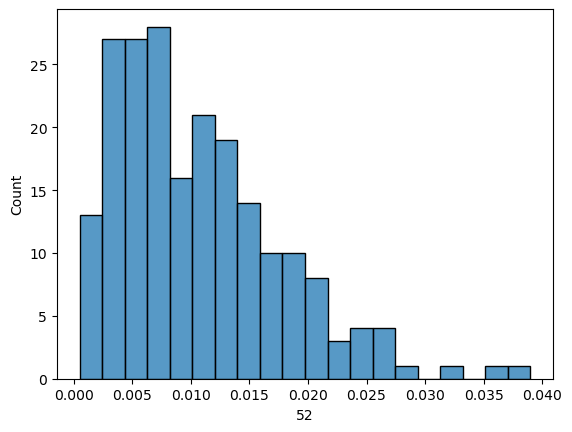

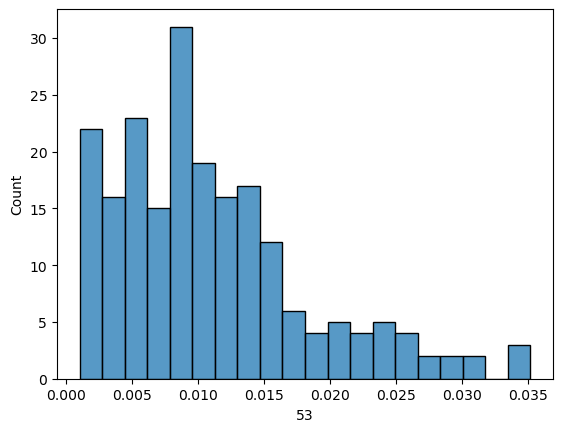

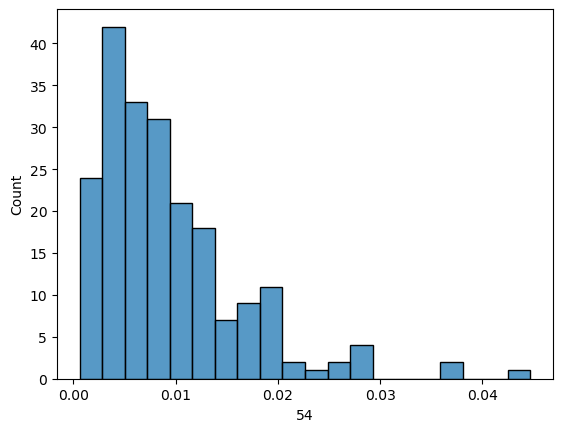

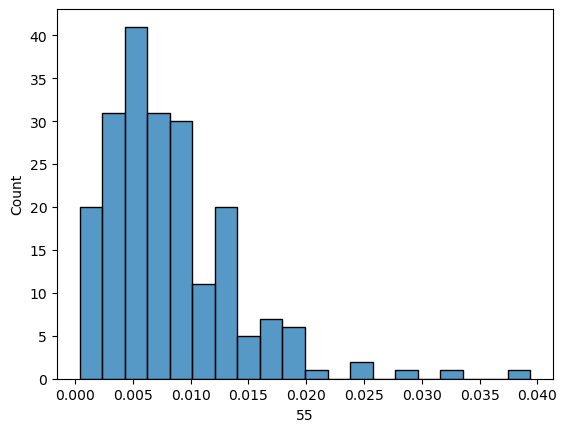

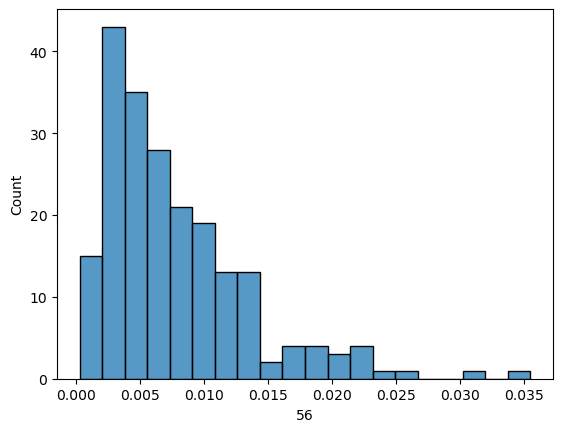

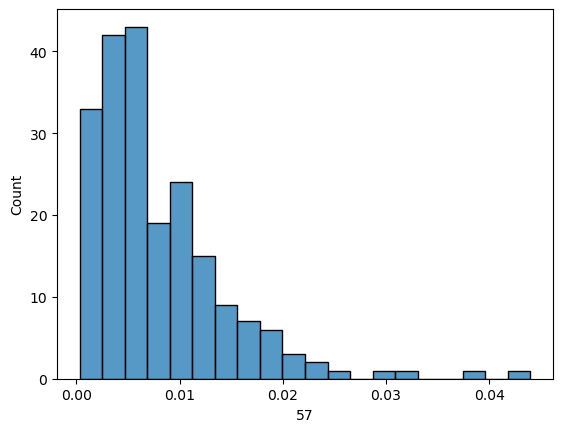

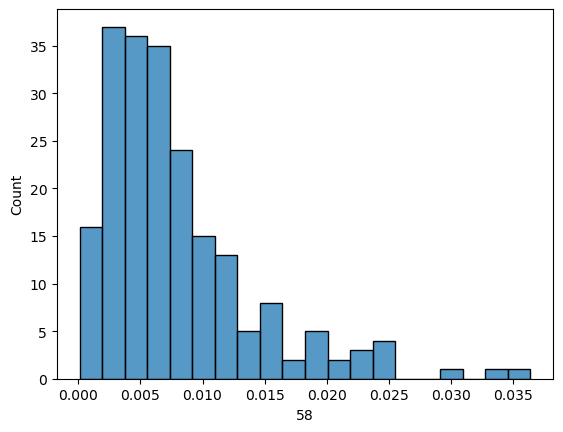

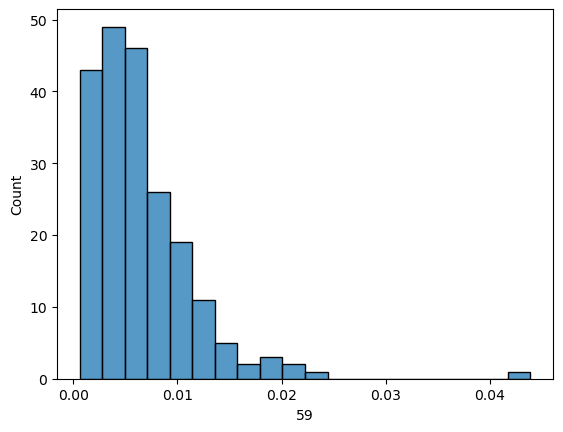

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical column
for i in range(60):
    sns.histplot(sonar_data[i], bins=20)
    plt.show()


In [23]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(sonar_data[50].dropna()))
outliers = sonar_data[z_scores > 3]
print(outliers)

         0       1       2       3       4       5       6       7       8   \
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
146  0.1021  0.0830  0.0577  0.0627  0.0635  0.1328  0.0988  0.1787  0.1199   

         9       10      11      12      13      14      15      16      17  \
140  0.2058  0.1546  0.2671  0.3141  0.2904  0.3531  0.5079  0.4639  0.1859   
146  0.1369  0.2509  0.2631  0.2796  0.2977  0.3823  0.3129  0.3956  0.2093   

         18      19      20      21      22      23      24      25      26  \
140  0.4474  0.4079  0.5400  0.4786  0.4332  0.6113  0.5091  0.4606  0.7243   
146  0.3218  0.3345  0.3184  0.2887  0.3610  0.2566  0.4106  0.4591  0.4722   

         27      28      29      30      31      32      33      34      35  \
140  0.8987  0.8826  0.9201  0.8005  0.6033  0.2120  0.2866  0.4033  0.2803   
146  0.7278  0.7591  0.6579  0.7514  0.6666  0.4903  0.5962  0.6552  0.4014   

         36      37      38      39      40     

In [24]:
X = sonar_data.drop(60, axis=1)
y = sonar_data[60]
y= y.map({'R': 0, 'M': 1})  # Convert labels to binary #R for Rock, M for Mine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.57%


## Create Predictive System

In [29]:
input_data=np.array([0.0134, 0.0172, 0.0178, 0.0363, 0.0444, 0.0744, 0.0800, 0.0456, 0.0368, 0.1250, 0.2405, 0.2325, 0.2523, 0.1472, 0.0669, 0.1100, 0.2353, 0.3282, 0.4416, 0.5167, 0.6508, 0.7793, 0.7978, 0.7786, 0.8587, 0.9321, 0.9454, 0.8645, 0.7220, 0.4850, 0.1357, 0.2951, 0.4715, 0.6036, 0.8083, 0.9870, 0.8800, 0.6411, 0.4276, 0.2702, 0.2642, 0.3342, 0.4335, 0.4542, 0.3960, 0.2525, 0.1084, 0.0372, 0.0286, 0.0099, 0.0046, 0.0094, 0.0048, 0.0047, 0.0016, 0.0008, 0.0042, 0.0024, 0.0027, 0.0041])
input_data = input_data.reshape(1, -1)  # Reshape to match the model's input shape
prediction= model_lr.predict(input_data)
if prediction[0] == 0:
    print("The input data is classified as Rock.")
else:
    print("The input data is classified as Mine.")

The input data is classified as Mine.
